# NDSRS: SRS protocol with node-dependent $q$

Here we anlyze the node-dependent SRS protocol (NDSRS). Instead of being parametrized by a single swap probability $q$, each node $i$ has now an individual swap probability $q_i$.

Below, we validate the code used to simulate the NDSRS protocol.

In [46]:
import main_cd as main
import importlib as imp

# Other modules
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdmn
import importlib as imp
import os
import random

# Save figures in the notebook with decent quality
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

# Create figures directory if needed
try:
    os.mkdir('figs')
except FileExistsError:
    pass

---
---
---
## Test 0: time evolution of the virtual network

We test with a squared grid where only the first and last node can do swaps.

In [106]:
imp.reload(main)

## PROTOCOL
protocol = 'ndsrs' # 'ndsrs' is Node-Dependent SRS

## TOPOLOGY
l = 4
A = main.adjacency_squared_hard(l)

## HARDWARE
p_gen = 1
p_swap = 1
qbits_per_channel = 3

## SOFTWARE
q_swap = [1]+[0]*(l**2-2)+[1]
max_links_swapped = 4
p_cons = 0

## CUTOFF
cutoff = 20

## SIMULATION
total_time = 5
randomseed = 2
np.random.seed(randomseed)

----------
t = 0


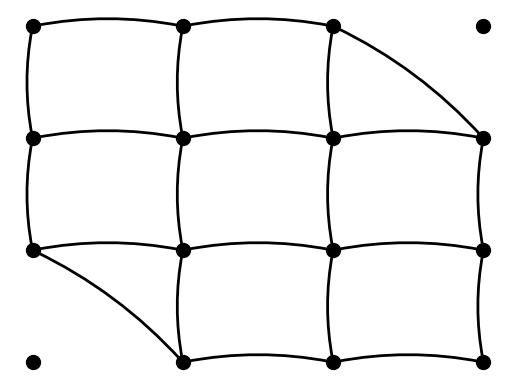

----------
t = 1


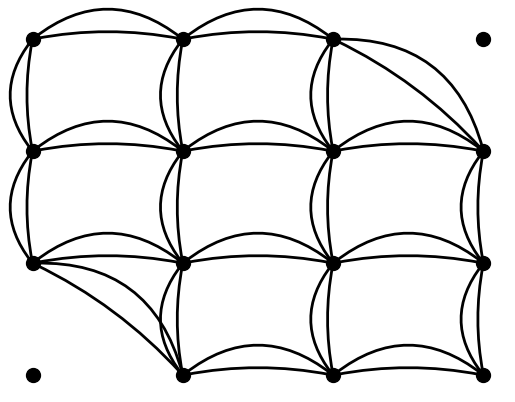

----------
t = 2


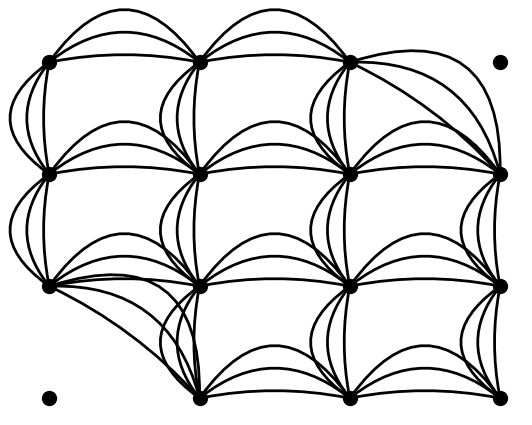

----------
t = 3


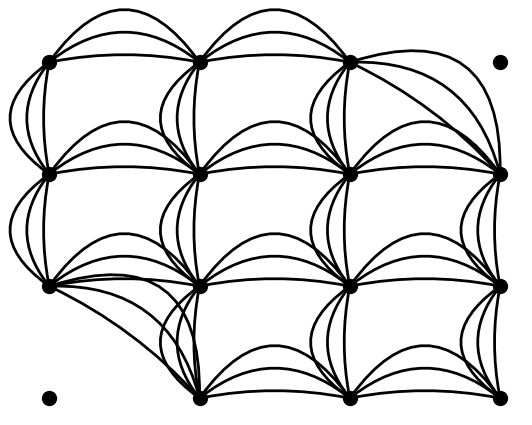

----------
t = 4


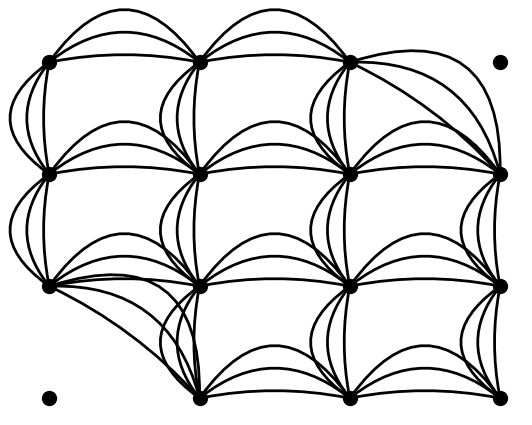

In [107]:
imp.reload(main)

S = main.create_qubit_registers(A, qbits_per_channel)
for t in range(total_time):
    print('----------')
    print('t =',t)
    S = main.step_protocol_ndsrs(S, p_gen, q_swap, p_swap, p_cons, cutoff, max_links_swapped)
    main.plot_entangled_links(S, layout='squared', show_link_data=False)

---
---
---
We now allow swaps in one of the middle nodes.

In [110]:
imp.reload(main)

## PROTOCOL
protocol = 'ndsrs' # 'ndsrs' is Node-Dependent SRS

## TOPOLOGY
l = 4
A = main.adjacency_squared_hard(l)

## HARDWARE
p_gen = 1
p_swap = 1
qbits_per_channel = 3

## SOFTWARE
q_swap = [0]*l**2
q_swap[l+2] = 1
max_links_swapped = 4
p_cons = 0

## CUTOFF
cutoff = 20

## SIMULATION
total_time = 10
randomseed = 2
np.random.seed(randomseed)

----------
t = 0


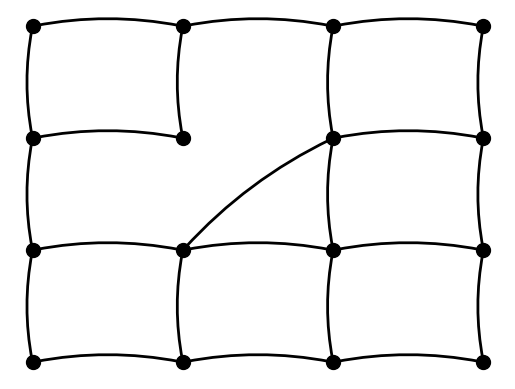

----------
t = 1


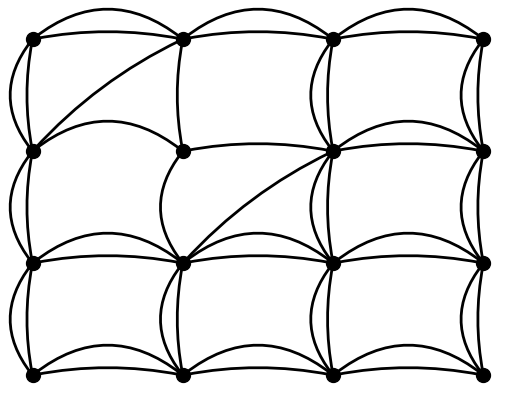

----------
t = 2


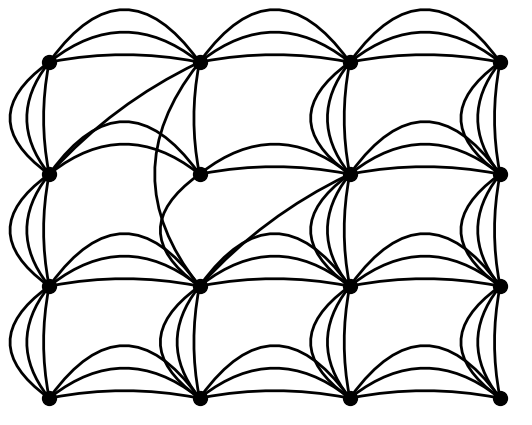

----------
t = 3


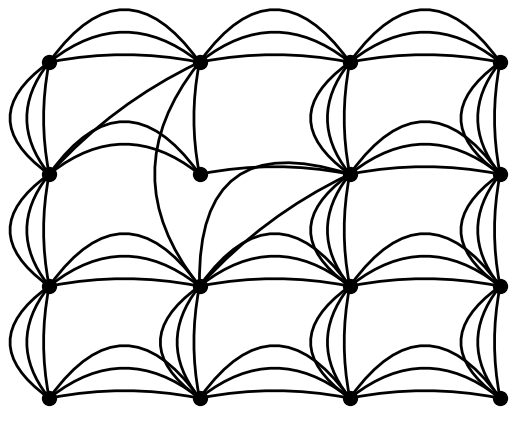

----------
t = 4


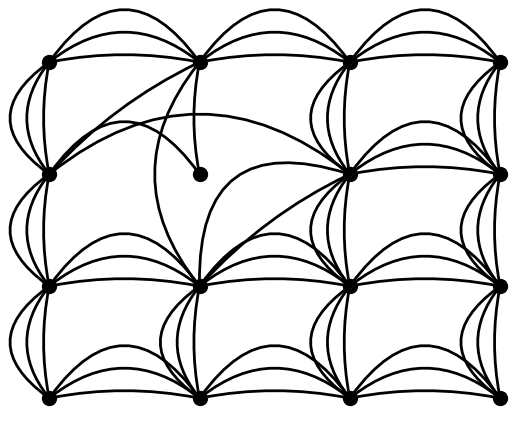

----------
t = 5


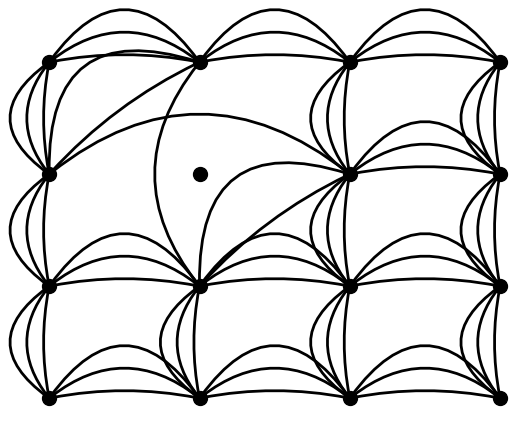

----------
t = 6


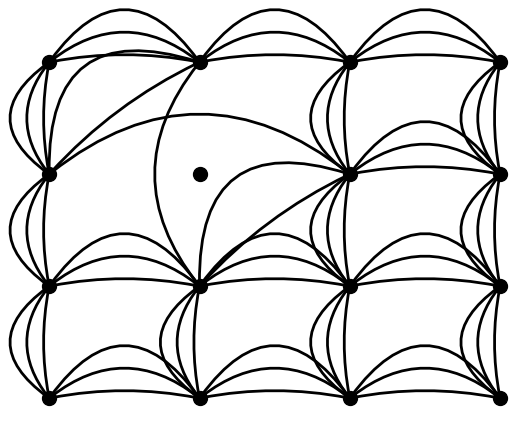

----------
t = 7


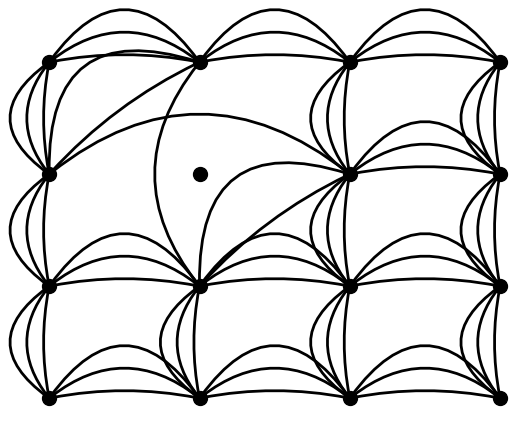

----------
t = 8


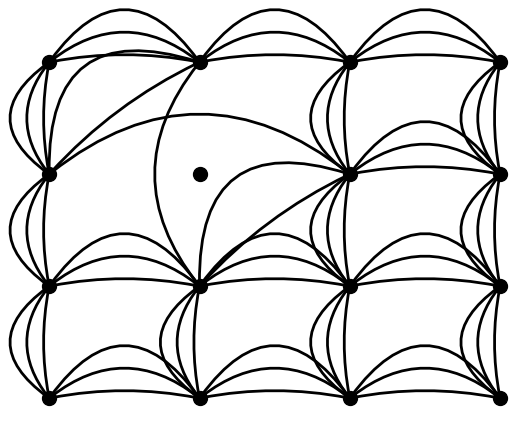

----------
t = 9


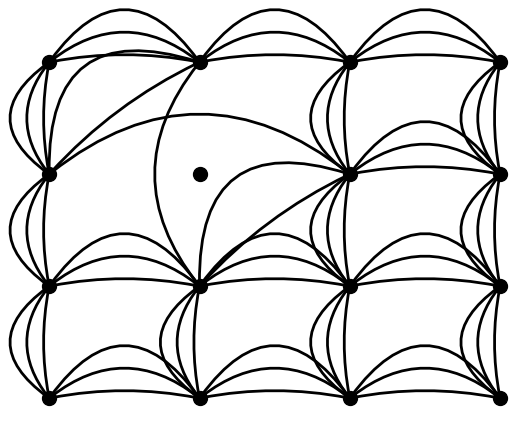

In [112]:
imp.reload(main)

S = main.create_qubit_registers(A, qbits_per_channel)
for t in range(total_time):
    print('----------')
    print('t =',t)
    S = main.step_protocol_ndsrs(S, p_gen, q_swap, p_swap, p_cons, cutoff, max_links_swapped)
    main.plot_entangled_links(S, layout='squared', show_link_data=False)

---
---
---
## Test 1: (2,3)-tree with no swaps and $p_\mathrm{gen}=1$

We expect the $v_i$ of nodes in layer 0/1/2 to converge to 2/3/1.

We expect the $k_i$ of nodes in layer 0/1/2 to converge to $2/3/1\cdot r$.

In [55]:
imp.reload(main)

## PROTOCOL
protocol = 'ndsrs' # 'ndsrs' is Node-Dependent SRS
nd_label = 'test1' # Label to save data in NDSRS

## TOPOLOGY
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

## HARDWARE
p_gen = 1
p_swap = 1
qbits_per_channel = 5

## SOFTWARE
q_swap = [0,0,0,0,0,0,0]
max_links_swapped = 4
p_cons = 0.1

## CUTOFF#
cutoff = 20

## SIMULATION
data_type = 'avg'
N_samples = 100
total_time = int(cutoff*5)
plot_nodes = [0,1,2]
randomseed = 2
np.random.seed(randomseed)

In [56]:
imp.reload(main)

# Check if data exists
if not main.check_data_cd(protocol, data_type, topology, n, p_gen,
            q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
            qbits_per_channel, N_samples, total_time, randomseed,
            nd_label):

    # Run simulation
    data = main.simulation_cd(protocol, A, p_gen, q_swap, p_swap,
                                p_cons, cutoff, max_links_swapped,
                                qbits_per_channel, N_samples,
                                total_time,
                                progress_bar='notebook',
                                return_data=data_type)
    # Save data
    main.save_data_cd(data, protocol, data_type, topology, n,
                    p_gen, q_swap, p_swap, p_cons, cutoff,
                    max_links_swapped, qbits_per_channel, N_samples,
                    total_time, randomseed, nd_label)
    
    print('Done! Data saved!')

else:
    print('Data already exists!')

Samples:   0%|          | 0/99 [00:00<?, ?it/s]

Done! Data saved!


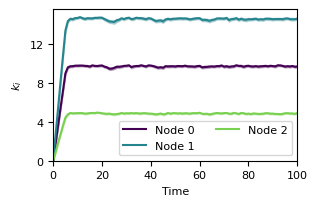

Maximum std: 1.084
Maximum standard error: 0.108


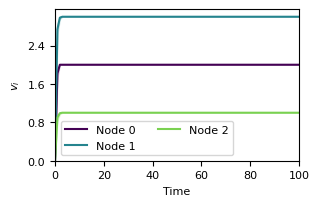

Maximum std: 0.533
Maximum standard error: 0.053


In [57]:
imp.reload(main)

main.plot_avgs(plot_nodes, protocol, data_type, topology, n, p_gen,
                q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
                qbits_per_channel, N_samples, total_time, randomseed,
                nd_label=nd_label)

---
---
---
## Test 2: (2,3)-tree with swaps only at level 0 ($q_0=1$, $p_\mathrm{swap}=1$, $p_\mathrm{gen}=1$)

We expect the $v_i$ of nodes in layer 0/1/2 to converge to 0/3/1.

We expect the $k_i$ of nodes in layer 0/1/2 to converge to $0/3/1\cdot r$.

In [58]:
imp.reload(main)

## PROTOCOL
protocol = 'ndsrs' # 'ndsrs' is Node-Dependent SRS
nd_label = 'test2' # Label to save data in NDSRS

## TOPOLOGY
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

## HARDWARE
p_gen = 1
p_swap = 1
qbits_per_channel = 5

## SOFTWARE
q_swap = [1,0,0,0,0,0,0]
max_links_swapped = 4
p_cons = 0.1

## CUTOFF#
cutoff = 20

## SIMULATION
data_type = 'avg'
N_samples = 100
total_time = int(cutoff*5)
plot_nodes = [0,1,2]
randomseed = 2
np.random.seed(randomseed)

In [59]:
imp.reload(main)

# Check if data exists
if not main.check_data_cd(protocol, data_type, topology, n, p_gen,
            q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
            qbits_per_channel, N_samples, total_time, randomseed,
            nd_label):

    # Run simulation
    data = main.simulation_cd(protocol, A, p_gen, q_swap, p_swap,
                                p_cons, cutoff, max_links_swapped,
                                qbits_per_channel, N_samples,
                                total_time,
                                progress_bar='notebook',
                                return_data=data_type)
    # Save data
    main.save_data_cd(data, protocol, data_type, topology, n,
                    p_gen, q_swap, p_swap, p_cons, cutoff,
                    max_links_swapped, qbits_per_channel, N_samples,
                    total_time, randomseed, nd_label)
    
    print('Done! Data saved!')

else:
    print('Data already exists!')

Samples:   0%|          | 0/99 [00:00<?, ?it/s]

Done! Data saved!


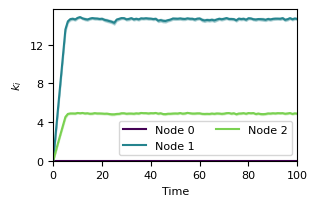

Maximum std: 1.096
Maximum standard error: 0.110


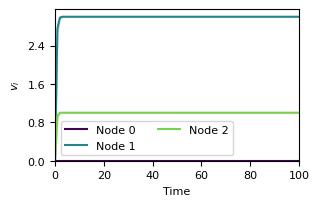

Maximum std: 0.457
Maximum standard error: 0.046


In [60]:
imp.reload(main)

main.plot_avgs(plot_nodes, protocol, data_type, topology, n, p_gen,
                q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
                qbits_per_channel, N_samples, total_time, randomseed,
                nd_label=nd_label)

---
---
---
## Test 3: (2,3)-tree with swaps at levels 0 and 1 ($q_0=1$, $q_1=1$; $p_\mathrm{swap}=1$, $p_\mathrm{gen}=1$)

We expect the $v_i$ of nodes in layer 0/1/2 to converge to 0/?/3.

We expect the $k_i$ of nodes in layer 0/1/2 to converge to $0/?/1\cdot r$.

In [67]:
imp.reload(main)

## PROTOCOL
protocol = 'ndsrs' # 'ndsrs' is Node-Dependent SRS
nd_label = 'test3' # Label to save data in NDSRS

## TOPOLOGY
d = 2
k = 3
n = int(str(d)+str(k)) # This variable is only for data storage purposes
A = main.adjacency_tree(d,k)
topology = 'tree'

## HARDWARE
p_gen = 1
p_swap = 1
qbits_per_channel = 5

## SOFTWARE
q_swap = [1,1,0,0,1,0,0]
max_links_swapped = 4
p_cons = 0.1

## CUTOFF#
cutoff = 20

## SIMULATION
data_type = 'avg'
N_samples = 100
total_time = int(cutoff*10)
plot_nodes = [0,1,2]
randomseed = 2
np.random.seed(randomseed)

In [68]:
imp.reload(main)

# Check if data exists
if not main.check_data_cd(protocol, data_type, topology, n, p_gen,
            q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
            qbits_per_channel, N_samples, total_time, randomseed,
            nd_label):

    # Run simulation
    data = main.simulation_cd(protocol, A, p_gen, q_swap, p_swap,
                                p_cons, cutoff, max_links_swapped,
                                qbits_per_channel, N_samples,
                                total_time,
                                progress_bar='notebook',
                                return_data=data_type)
    # Save data
    main.save_data_cd(data, protocol, data_type, topology, n,
                    p_gen, q_swap, p_swap, p_cons, cutoff,
                    max_links_swapped, qbits_per_channel, N_samples,
                    total_time, randomseed, nd_label)
    
    print('Done! Data saved!')

else:
    print('Data already exists!')

Data already exists!


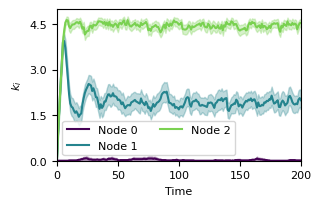

Maximum std: 1.717
Maximum standard error: 0.172


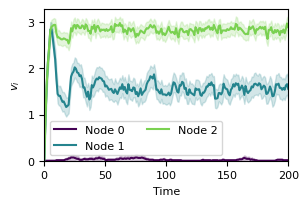

Maximum std: 1.296
Maximum standard error: 0.130


In [69]:
imp.reload(main)

main.plot_avgs(plot_nodes, protocol, data_type, topology, n, p_gen,
                q_swap_vec, p_swap, p_cons, cutoff, max_links_swapped,
                qbits_per_channel, N_samples, total_time, randomseed,
                nd_label=nd_label)